In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import numpy as np

In [2]:
dataset = pd.read_csv('mushrooms.csv')

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

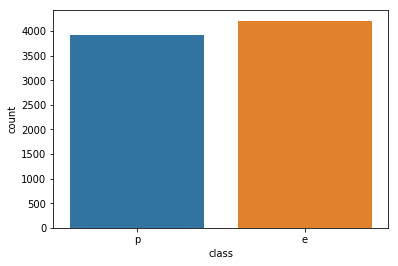

In [5]:
dataset['class'].value_counts()
sns.countplot(x='class',data = dataset)
plt.show()

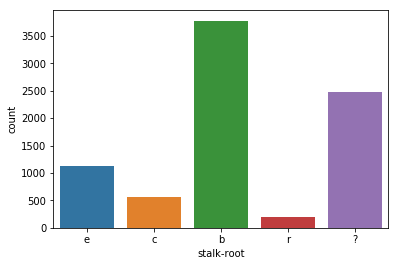

In [14]:
# according to the dataset information, '?' there in the dataset, which indicates the missing value
dataset['stalk-root'].unique()
sns.countplot(x= 'stalk-root', data = dataset)
plt.show()

In [23]:
dataset['stalk-root'] = dataset['stalk-root'].replace({np.NaN:'m'})
dataset['stalk-root'].value_counts()

b    3776
m    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [24]:
Num_val = {'e':1, 'p':0}
dataset['class'] = dataset['class'].apply(lambda x: Num_val[x])
dataset = pd.get_dummies(dataset)
dataset.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 118 entries, class to habitat_w
dtypes: int64(1), uint8(117)
memory usage: 991.8 KB


In [26]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
print(X.shape)
print(y.shape)

(8124, 117)
(8124,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6499, 117) (1625, 117) (6499,) (1625,)


In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = log.predict(X_test)
print(y_pred, y_test)

[1 0 0 ... 0 0 0] [1 0 0 ... 0 0 0]


In [32]:
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier_d = DecisionTreeClassifier()
classifier_d.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_pred = classifier_d.predict(X_test)
print(y_pred, y_test)

[1 0 0 ... 0 0 0] [1 0 0 ... 0 0 0]


In [35]:
print(accuracy_score(y_test, y_pred))

1.0
